In [185]:
import open3d as o3d
import numpy as np
import math
import copy

In [184]:
def write_pcd(file, out_file='pcd.txt', height=0):
    """ write one measurement per angle to out file (in euclidean format) """
    angles = []
    distances = []
    seen = set()

    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            angle, dist, quality = map(lambda x : float(x.split(':')[1]), line.split())
            angle = math.floor(angle)
            if angle not in seen:
                angles.append(math.radians(angle))
                distances.append(dist)
                seen.add(angle)

    angles = np.array(angles)
    distances = np.array(distances)
    
    points_x = np.cos(angles) * distances
    points_y = np.sin(angles) * distances

    # write in x y z format for open3d
    with open(out_file, 'w') as f:
        for x, y in zip(points_x, points_y):
            f.write(f'{x} {y} {height}\n')



In [190]:
write_pcd('out/1.txt', out_file='out_uni/1.txt')
write_pcd('out/2.txt', out_file='out_uni/2.txt')
write_pcd('out/3.txt', out_file='out_uni/3.txt')
write_pcd('out/4.txt', out_file='out_uni/4.txt')


In [148]:
# pcd = o3d.io.read_point_cloud("small_room_euclid/sm_points_1.txt", format='xyz')
# print(pcd)
# pcd.paint_uniform_color([0.5, 0, 0.8])
# o3d.visualization.draw_geometries([pcd],
#                                    zoom=0.3412,
#                                    front=[0.4257, -0.2125, -0.8795],
#                                    lookat=[2.6172, 2.0475, 1.532],
#                                    up=[-0.0694, -0.9768, 0.2024])

In [169]:
# pcd_1 = o3d.io.read_point_cloud("small_room_euclid/sm_points_1.txt", format='xyz')
# pcd_2 = o3d.io.read_point_cloud("small_room_euclid/sm_points_2.txt", format='xyz')
pcd_3 = o3d.io.read_point_cloud("sme_uni/sm_points_3.txt", format='xyz')
pcd_4 = o3d.io.read_point_cloud("sme_uni/sm_points_4.txt", format='xyz')
pcd_wm = o3d.io.read_point_cloud("sme_uni/sm_points_wm.txt", format='xyz')
pcd_side = o3d.io.read_point_cloud("sme_uni/sm_points_side.txt", format='xyz')
# pcd_5 = o3d.io.read_point_cloud("small_room_euclid/sm_points_5.txt", format='xyz')


In [193]:
pcd_1 = o3d.io.read_point_cloud("out_uni/1.txt", format='xyz')
pcd_2 = o3d.io.read_point_cloud("out_uni/2.txt", format='xyz')
pcd_3 = o3d.io.read_point_cloud("out_uni/3.txt", format='xyz')
pcd_4 = o3d.io.read_point_cloud("out_uni/4.txt", format='xyz')


In [170]:
pcd_wm.rotate(
    pcd_wm.get_rotation_matrix_from_xyz((0, 0, 1.05*np.pi)),
    center=(0, 0, 0)
)
pcd_side.rotate(
    pcd_side.get_rotation_matrix_from_xyz((0, 0, 1.05*np.pi)),
    center=(0, 0, 0)
)
    
# print(np.asarray(pcd_side.points).mean(axis=0, keepdims=True))
# print(np.asarray(pcd_wm.points).mean(axis=0, keepdims=True))
# print(np.asarray(pcd_3.points).mean(axis=0, keepdims=True))
# print(np.asarray(pcd_4.points).mean(axis=0, keepdims=True))


# o3d.visualization.draw_geometries([pcd_wm, pcd_side, pcd_3, pcd_4])

PointCloud with 360 points.

### outlier removal

In [3]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True)

    print("Showing outliers (red) and inliers (green: ")
    outlier_cloud.paint_uniform_color([1, 0, 0])
    inlier_cloud.paint_uniform_color([0, 1, 0])
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                      zoom=0.3412,
                                      front=[0.4257, -0.2125, -0.8795],
                                      lookat=[2.6172, 2.0475, 1.532],
                                      up=[-0.0694, -0.9768, 0.2024])

In [4]:
def remove_outliers(pcd):
    cl, ind = pcd.remove_statistical_outlier(nb_neighbors=20,
                                                    std_ratio=2.0)
    return cl

In [28]:
pcd = o3d.io.read_point_cloud("small_room_euclid/sm_points_side.txt", format='xyz')
print("Statistical oulier removal")
cl, ind = pcd.remove_statistical_outlier(nb_neighbors=20,
                                                    std_ratio=2.0)
display_inlier_outlier(pcd, ind)

Statistical oulier removal


In [5]:
pcd_3 = remove_outliers(pcd_3)
pcd_4 = remove_outliers(pcd_4)
pcd_wm = remove_outliers(pcd_wm)
pcd_side = remove_outliers(pcd_side)

### normalisation

In [154]:
def normalise_pcd(pcd):
    points = np.asarray(pcd.points)

    # get centroid of point cloud
    centroid = points.mean(axis=0, keepdims=True)
    # subtract centroid from all points to set centroid to origin
    points = points - centroid

    # set normalised point cloud to the pcd object
    pcd.points = o3d.utility.Vector3dVector(points)


In [165]:

temp_3 = copy.deepcopy(pcd_3)
normalise_pcd(temp_3)
pcd_3.paint_uniform_color([0.5, 0, 0.8])
temp_3.paint_uniform_color([0.5, 0, 0])


temp_wm = copy.deepcopy(pcd_wm)
normalise_pcd(temp_wm)
pcd_wm.paint_uniform_color([0.5, 0, 0.8])
temp_wm.paint_uniform_color([0.5, 0, 0])

temp_side = copy.deepcopy(pcd_side)
normalise_pcd(temp_side)
pcd_side.paint_uniform_color([0.5, 0, 0.8])
temp_side.paint_uniform_color([0.5, 0, 0])

# normalise_pcd(pcd_3)
# normalise_pcd(pcd_4)
# normalise_pcd(pcd_wm)
# normalise_pcd(pcd_side)

# temp_wm = copy.deepcopy(pcd_wm)
# normalise_pcd(temp_wm)

# temp_side = copy.deepcopy(pcd_side)
# normalise_pcd(temp_side)

# pcd_3.paint_uniform_color([0.5, 0, 0])
# pcd_wm.paint_uniform_color([0.5, 0, 0.8])

# normalise_pcd(pcd_side)
o3d.visualization.draw_geometries([temp_3, pcd_3, pcd_side, temp_side])

In [176]:
pcd_3.get_center()[0]

141.283325943572

In [182]:
# temp_3 = copy.deepcopy(pcd_3).translate((0, 0, 0), relative=False)
# pcd_3.paint_uniform_color([0.5, 0, 0.8])
# temp_3.paint_uniform_color([0.5, 0, 0])

cx, cy, cz = pcd_3.get_center()

temp_side = copy.deepcopy(pcd_side).translate((cx, cy, cz), relative=False)
pcd_side.paint_uniform_color([0.5, 0, 0.8])
temp_side.paint_uniform_color([0.5, 0, 0])
pcd_3.paint_uniform_color([0, 0.5, 0])

o3d.visualization.draw_geometries([pcd_3, temp_side, pcd_side])

In [156]:
np.asarray(pcd_wm.points)

array([[-1925.37320727,   -81.32956437,     0.        ],
       [-1942.79804651,  -122.60988506,     0.        ],
       [-1939.7909136 ,  -160.78370365,     0.        ],
       ...,
       [-1944.08443894,    30.1616616 ,     0.        ],
       [-1934.85410173,    -6.68529278,     0.        ],
       [-1935.8864415 ,   -44.80992892,     0.        ]])

### add origin to point cloud

In [157]:
np.asarray(pcd_3.points)

array([[1871.71667406, -308.33309302,    0.        ],
       [2003.38998017, -270.89768122,    0.        ],
       [2250.25892311, -224.81859741,    0.        ],
       ...,
       [1662.24161382, -402.85183   ,    0.        ],
       [1657.62016269, -371.15218709,    0.        ],
       [1683.43871772, -340.18373477,    0.        ]])

In [145]:
def add_center(pcd):
    center = np.array([0., 0., 0.]).reshape(1, -1)
    points = np.asarray(pcd.points)
    points = np.append(points, center, axis=0)
    pcd.points = o3d.utility.Vector3dVector(points)

In [146]:
add_center(pcd_3)
add_center(pcd_4)
add_center(pcd_wm)
add_center(pcd_side)

### visualise

In [49]:
# pcd_1 = pcd_1.translate((0,0,200))
# pcd_2 = pcd_2.translate((0,0,400))

# pcd_5 = pcd_5.translate((0,0,1000))

In [150]:
# The x, y, z axis will be rendered as red, green, and blue arrows respectively.
coord_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=200)

# pcd_3 = pcd_3.translate((0,0,600))
# pcd_4 = pcd_4.translate((0,0,1000))
# pcd_wm = pcd_wm.translate((0,0,1400))
# pcd_side = pcd_side.translate((0,0,1800))

# pcd_1.paint_uniform_color([0.5, 0, 0.8])
# pcd_2.paint_uniform_color([0.5, 0, 0.8])
pcd_3.paint_uniform_color([0.5, 0, 0.8])
pcd_4.paint_uniform_color([0.5, 0, 0.8])
pcd_wm.paint_uniform_color([0.5, 0, 0.8])
pcd_side.paint_uniform_color([0.5, 0, 0.8])
# pcd_5.paint_uniform_color([0.5, 0, 0.8])

o3d.visualization.draw_geometries([pcd_3, pcd_4, pcd_wm, pcd_side])
# o3d.visualization.draw_geometries([pcd_wm, pcd_3, pcd_4])

In [192]:
pcd_1.translate((0,0,600))
pcd_2.translate((0,0,1000))
pcd_3.translate((0,0,1400))
pcd_4.translate((0,0,1800))

pcd_1.paint_uniform_color([0.5, 0, 0.8])
pcd_2.paint_uniform_color([0.5, 0, 0.8])
pcd_3.paint_uniform_color([0.5, 0, 0.8])
pcd_4.paint_uniform_color([0.5, 0, 0.8])

o3d.visualization.draw_geometries([pcd_1, pcd_2, pcd_3, pcd_4])
# o3d.visualization.draw_geometries([pcd_wm, pcd_3, pcd_4])

#### Manually rotate scans

In [91]:
temp = copy.deepcopy(pcd_3)
temp.paint_uniform_color([0.5, 0, 0])
pcd_side_rot = temp.rotate(pcd_side.get_rotation_matrix_from_xyz((0, 0, -1.05*np.pi)),
              center=(0, 0, 0))
    
o3d.visualization.draw_geometries([pcd_wm, pcd_side_rot])

### point set registration (kinda working)
point cloud is 2D

In [78]:
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp],
                                      zoom=0.4559,
                                      front=[0.6452, -0.3036, -0.7011],
                                      lookat=[1.9892, 2.0208, 1.8945],
                                      up=[-0.2779, -0.9482, 0.1556])

In [66]:
# evaluation = o3d.pipelines.registration.evaluate_registration(
#     source, target, 250, trans_init)
# print(evaluation)

RegistrationResult with fitness=2.033426e-01, inlier_rmse=1.522827e+02, and correspondence_set size of 73
Access transformation to get result.


In [197]:
# source = o3d.io.read_point_cloud("sme_uni/sm_points_3.txt", format='xyz')
# target = o3d.io.read_point_cloud("sme_uni/sm_points_wm.txt", format='xyz')

trans_init = np.eye(4,4)

source = pcd_4
target = pcd_1

print("Apply point-to-point ICP")
reg_p2p = o3d.pipelines.registration.registration_icp(
    source, target, 200, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint(),
    o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=2000))
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)


# source.transform(reg_p2p.transformation)

draw_registration_result(source, target, reg_p2p.transformation)

Apply point-to-point ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=2.657564e+01, and correspondence_set size of 360
Access transformation to get result.
Transformation is:
[[  0.98285917  -0.18435795   0.         -10.58415239]
 [  0.18435795   0.98285917   0.         -36.01000517]
 [  0.           0.           1.           0.        ]
 [  0.           0.           0.           1.        ]]


### RANSAC registration based on feature matching (not working as of now)

In [140]:
# def preprocess_point_cloud(pcd, voxel_size):
#     radius_normal = voxel_size * 2
    
#     pcd.estimate_normals(
#         o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30)
#     )

#     radius_feature = voxel_size * 5
#     pcd_fpfh = o3d.pipelines.registration.compute_fpfh_feature(
#         pcd,
#         o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=100)
#     )
#     return pcd, pcd_fpfh

In [141]:
# def prepare_dataset(voxel_size):
#     print(":: Load two point clouds")
#     source = o3d.io.read_point_cloud("points_3.txt", format='xyz')
#     target = o3d.io.read_point_cloud("points_2.txt", format='xyz')
#     # trans_init = np.asarray([[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0],
#     #                          [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
#     # source.transform(trans_init)
#     draw_registration_result(source, target, np.identity(4))

#     source_down, source_fpfh = preprocess_point_cloud(source, voxel_size)
#     target_down, target_fpfh = preprocess_point_cloud(target, voxel_size)
#     return source, target, source_down, target_down, source_fpfh, target_fpfh

In [142]:
# voxel_size = 0.05  # means 5cm for this dataset
# source, target, source_down, target_down, source_fpfh, target_fpfh = prepare_dataset(voxel_size)

In [143]:
# def execute_global_registration(source_down, target_down, source_fpfh,
#                                 target_fpfh, voxel_size):
#     distance_threshold = voxel_size * 1.5
#     print(":: RANSAC registration on downsampled point clouds.")
#     print("   Since the downsampling voxel size is %.3f," % voxel_size)
#     print("   we use a liberal distance threshold %.3f." % distance_threshold)
#     result = o3d.pipelines.registration.registration_ransac_based_on_feature_matching(
#         source_down, target_down, source_fpfh, target_fpfh, True,
#         distance_threshold,
#         o3d.pipelines.registration.TransformationEstimationPointToPoint(False),
#         3, [
#             o3d.pipelines.registration.CorrespondenceCheckerBasedOnEdgeLength(
#                 0.9),
#             o3d.pipelines.registration.CorrespondenceCheckerBasedOnDistance(
#                 distance_threshold)
#         ], o3d.pipelines.registration.RANSACConvergenceCriteria(100000, 0.999))
#     return result

In [144]:
# result_ransac = execute_global_registration(source_down, target_down, source_fpfh, target_fpfh, voxel_size)
# print(result_ransac)
# draw_registration_result(source_down, target_down, result_ransac.transformation)

In [145]:
# def refine_registration(source, target, source_fpfh, target_fpfh, voxel_size):
#     distance_threshold = voxel_size * 0.4
#     print(":: Point-to-plane ICP registration is applied on original point")
#     print("   clouds to refine the alignment. This time we use a strict")
#     print("   distance threshold %.3f." % distance_threshold)
#     result = o3d.pipelines.registration.registration_icp(
#         source, target, distance_threshold, result_ransac.transformation,
#         o3d.pipelines.registration.TransformationEstimationPointToPlane())
#     return result

In [146]:
# result_icp = refine_registration(source, target, source_fpfh, target_fpfh,
#                                  voxel_size)
# print(result_icp)
# draw_registration_result(source, target, result_icp.transformation)

### manual transformation of PCDs

In [61]:
pcd = o3d.io.read_point_cloud("points_3.txt", format='xyz')
print(pcd)
pcd.paint_uniform_color([0.5, 0, 0.8])
o3d.visualization.draw_geometries([pcd],
                                   zoom=0.3412,
                                   front=[0.4257, -0.2125, -0.8795],
                                   lookat=[2.6172, 2.0475, 1.532],
                                   up=[-0.0694, -0.9768, 0.2024])

PointCloud with 529 points.


In [3]:
pcd_1 = o3d.io.read_point_cloud("points_3.txt", format='xyz')
pcd_2 = o3d.io.read_point_cloud("points_2.txt", format='xyz')

In [18]:
pcd_1_trans = copy.deepcopy(pcd_1).translate((0, 0, 0))
pcd_2_trans = copy.deepcopy(pcd_2).translate((0, 0, 0))

print(f'center of 1: {pcd_1.get_center()}')
print(f'center of 2: {pcd_2.get_center()}')

pcd_1_trans.paint_uniform_color([1, 0.706, 0])
pcd_2_trans.paint_uniform_color([0, 0.651, 0.929])

o3d.visualization.draw_geometries([pcd_1_trans, pcd_2_trans])

center of 1: [-474.63903076 -225.26908688    0.        ]
center of 2: [-428.52238089 -329.83380932  500.        ]


### Alphashape (not working)

In [41]:
from scipy.spatial import Delaunay

In [33]:

import math
import numpy as np
import matplotlib.pyplot as plt

angles = []
distances = []

with open('out3.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        angle, dist, quality = map(lambda x : float(x.split(':')[1]), line.split())
        angles.append(math.radians(angle))
        distances.append(dist)

# angles = np.array(angles)
# distances = np.array(distances)

points_x = np.int16(np.cos(angles) * distances)
points_y = np.int16(np.sin(angles) * distances)

# points_x = np.cos(angles) * distances
# points_y = np.sin(angles) * distances

points = []

for x, y in zip(points_x, points_y):
    points.append([x, y])

points = np.array(points)

print(points[:2])

[[807   7]
 [817  14]]


In [59]:
tri = Delaunay(points)

In [56]:
tri.simplices

array([[411, 404, 405],
       [404, 411, 373],
       [367, 404, 373],
       ...,
       [387, 392, 428],
       [382, 387, 428],
       [386, 387, 382]], dtype=int32)

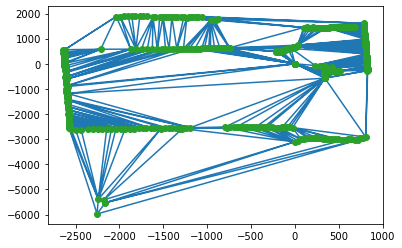

In [60]:
import matplotlib.pyplot as plt

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [26]:
import os 
import sys
import cv2
import numpy as np
import pandas as pd
from descartes import PolygonPatch
import matplotlib.pyplot as plt
import alphashape

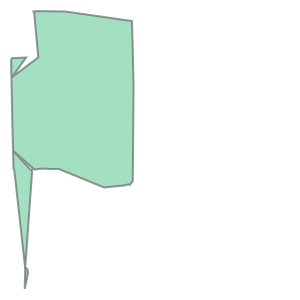

In [53]:
alphashape.alphashape(points, 0.001)

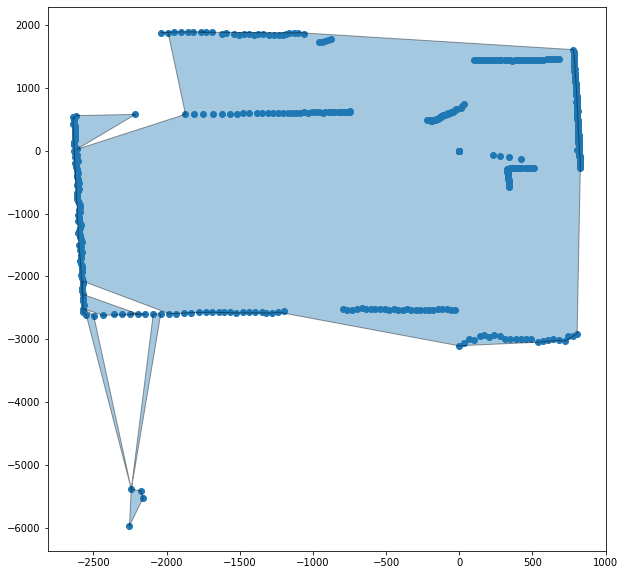

In [54]:
alpha_shape = alphashape.alphashape(points, 0.0019)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.4))
plt.show()

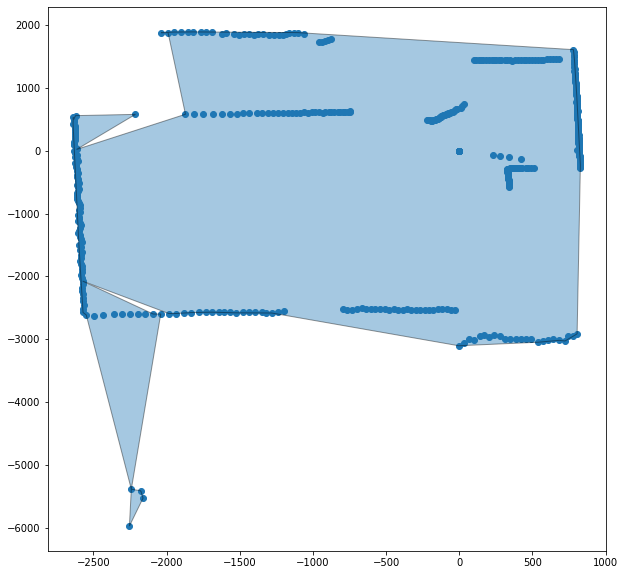

In [55]:
alpha_shape = alphashape.alphashape(points, 0.001)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.4))
plt.show()

In [32]:
pcd_1_tmp = copy.deepcopy(pcd_1).translate((0, 0, 0), relative=False)
pcd_2_tmp = copy.deepcopy(pcd_2).translate((0, 0, 0), relative=False)

coord_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=2.0, origin=[0.0, 0.0, 0.0])

# rotate 2nd scan to match first (HARDCODED)
# pcd_2_tmp.rotate(pcd_2_tmp.get_rotation_matrix_from_xyz((0, 0, -1 * np.pi / 64)),
#               center=(0, 0, 0))

pcd_1_tmp.paint_uniform_color([1, 0.706, 0])
pcd_2_tmp.paint_uniform_color([0, 0.651, 0.929])

print(f'center of 1: {pcd_1_tmp.get_center()}')
print(f'center of 2: {pcd_2_tmp.get_center()}')

print(coord_frame.get_center())

o3d.visualization.draw_geometries([pcd_1_tmp, pcd_2_tmp],
                                   zoom=0.3412,
                                   front=[0.4257, -0.2125, -0.8795],
                                   lookat=[2.6172, 2.0475, 1.532],
                                   up=[-0.0694, -0.9768, 0.2024])

center of 1: [-4.63773527e-13  5.90999629e-16  0.00000000e+00]
center of 2: [ 5.22613638e-13 -6.94440703e-13  0.00000000e+00]
[0.10335097 0.10335097 0.10335097]


In [36]:
pcd_1.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

pcd_2.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))


print(np.asarray(pcd_1.normals)[:5])
print(np.asarray(pcd_2.normals)[:5])

# pcd_1.orient_normals_to_align_with_direction(orientation_reference=[0, -1, 0])

# o3d.visualization.draw_geometries([pcd_1],
#                                   point_show_normal=True)



In [40]:
mesh_1 = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd_1, 0.03)
o3d.visualization.draw_geometries([pcd_1, mesh_1])

RuntimeError: QH6239 Qhull precision error: Initial simplex is cocircular or cospherical.  Use option 'Qz' for the Delaunay triangulation or Voronoi diagram of cocircular/cospherical points.  Option 'Qz' adds a point "at infinity".  Use option 'Qs' to search all points for the initial simplex.

While executing:  | qhull d Qbb Qt
Options selected for Qhull 2018.0.1.r 2018/12/28:
  run-id 515579106  delaunay  Qbbound-last  Qtriangulate  _pre-merge
  _zero-centrum  Pgood  _max-width 7.9e+03  Error-roundoff 1.6e-11
  _one-merge 1.4e-10  _near-inside 7.1e-10  Visible-distance 9.5e-11
  U-max-coplanar 9.5e-11  Width-outside 1.9e-10  _wide-facet 5.7e-10


In [ ]:
o3d.visualization.draw_geometries([pcd_1, pcd_2],
                                    zoom=0.3412,
                                    front=[0.4257, -0.2125, -0.8795],
                                    lookat=[2.6172, 2.0475, 1.532],
                                    up=[-0.0694, -0.9768, 0.2024],
                                    point_show_normal=True)

In [16]:
plane_model, inliers = pcd_1.segment_plane(distance_threshold=0.1,
                                             ransac_n=5,
                                             num_iterations=1000)
[a, b, c, d] = plane_model

print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

Plane equation: 0.00x + 0.00y + 1.00z + -0.00 = 0


In [17]:
print(f'center of 1: {pcd_1.get_center()}')

center of 1: [-474.63903076 -225.26908688    0.        ]


### keypoint detection

In [7]:
keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd)
pcd.paint_uniform_color([0.5, 0, 0.5])
keypoints.paint_uniform_color([0.5, 0, 0.0])
print(keypoints)

PointCloud with 0 points.


In [13]:

kps = o3d.pipelines.registration.compute_fpfh_feature()



['__class__', '__copy__', '__deepcopy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'data', 'dimension', 'num', 'resize']
